In [28]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [31]:
REB= pd.read_excel("Steel-express.xlsx","RECTANGULAR BOXES")

In [32]:
REB

,Date,Weeks,type,purchases(kg),sales(kg),stock,price for sales(EGP),price for purchases(EGP),Total Sales(EGP),Total Purchases(EGP),Average price,Average price for sales
0,2023-01-01,1,RECTANGULAR BOXES,60480,0,60480,0.0,41.3,0.0,2497824.0,41.300000,47.488192
1,2023-01-01,1,RECTANGULAR BOXES,45676,0,106156,0.0,40.8,0.0,1863580.8,41.084864,47.430357
2,2023-01-01,1,RECTANGULAR BOXES,59913,0,166069,0.0,42.5,0.0,2546302.5,41.595405,47.380797
3,2023-01-01,1,RECTANGULAR BOXES,6238,0,172307,0.0,41.3,0.0,257629.4,41.584710,47.176606
4,2023-01-01,1,RECTANGULAR BOXES,46054,0,218361,0.0,40.0,0.0,1842160.0,41.250483,47.098981
...,...,...,...,...,...,...,...,...,...,...,...,...
444,2023-11-15,46,RECTANGULAR BOXES,0,7676,75958,45.5,0.0,349258.0,0.0,41.914490,47.020685
445,2023-11-18,46,RECTANGULAR BOXES,0,412,75546,44.6,0.0,18375.2,0.0,41.914490,47.020639
446,2023-11-18,46,RECTANGULAR BOXES,0,203,75343,44.6,0.0,9053.8,0.0,41.914490,47.020594
447,2023-11-18,46,RECTANGULAR BOXES,0,1367,73976,42.3,0.0,57824.1,0.0,41.914490,47.020551


In [33]:
REB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      449 non-null    datetime64[ns]
 1   Weeks                     449 non-null    int64         
 2   type                      449 non-null    object        
 3   purchases(kg)             449 non-null    int64         
 4   sales(kg)                 449 non-null    int64         
 5   stock                     449 non-null    int64         
 6   price for sales(EGP)      398 non-null    float64       
 7   price for purchases(EGP)  449 non-null    float64       
 8   Total Sales(EGP)          449 non-null    float64       
 9   Total Purchases(EGP)      449 non-null    float64       
 10  Average price             449 non-null    float64       
 11  Average price for sales   449 non-null    float64       
dtypes: datetime64[ns](1), 

In [34]:
REB.isnull().sum()

Date                         0
Weeks                        0
type                         0
purchases(kg)                0
sales(kg)                    0
stock                        0
price for sales(EGP)        51
price for purchases(EGP)     0
Total Sales(EGP)             0
Total Purchases(EGP)         0
Average price                0
Average price for sales      0
dtype: int64

In [35]:
## Filling Mising DATA WITH 0

REB['price for sales(EGP)'].fillna(0,inplace=True)

REB['price for purchases(EGP)'].fillna(0,inplace=True)


## EDA

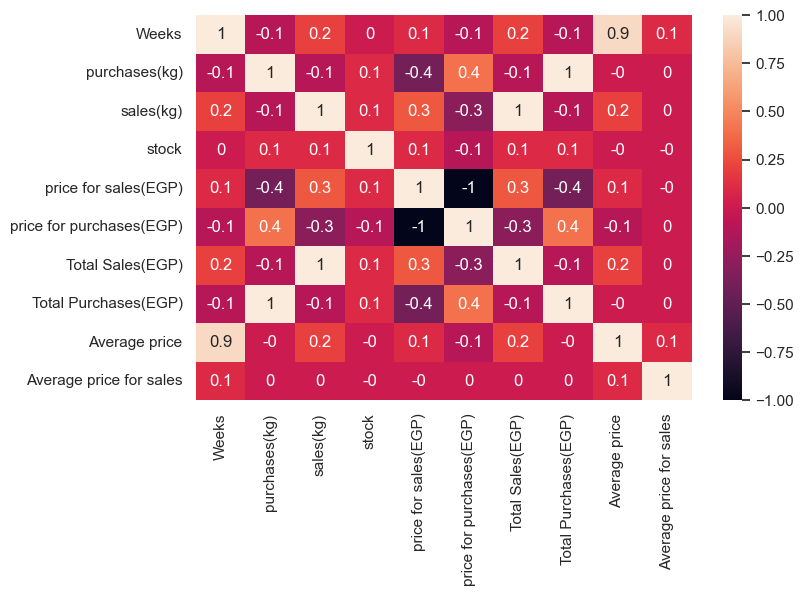

In [36]:
## correlation_matrix to see the correlation between columns
correlation_matrix = REB.corr().round(1)
sns.set(rc={'figure.figsize':(8,5)})
sns.heatmap(data=correlation_matrix, annot=True);

## Data Visualization"

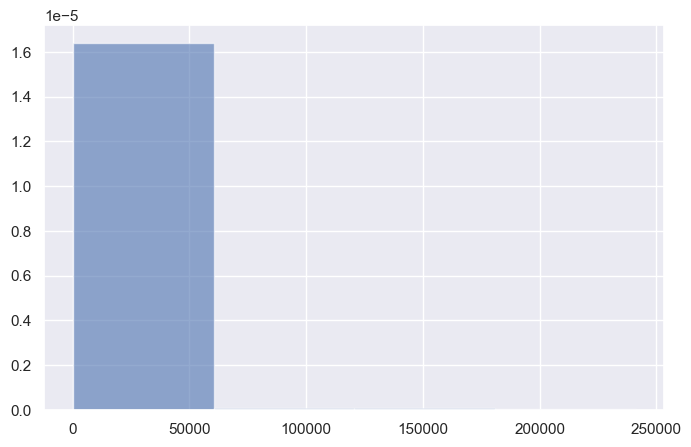

In [37]:

REB_PUR = REB['purchases(kg)']  

plt.hist(REB_PUR, bins=4, density=True, alpha=0.6, color='b')

plt.show()


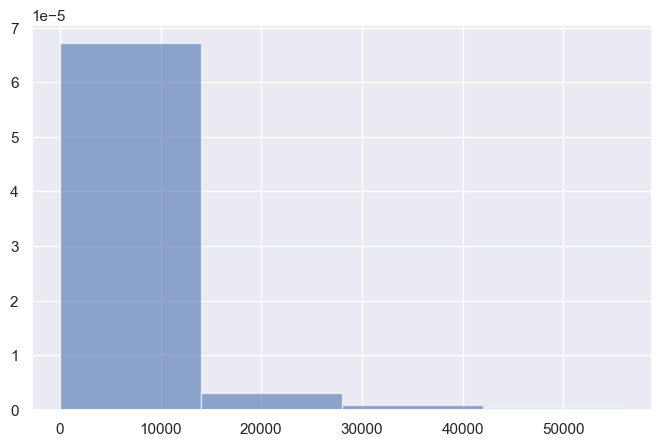

In [38]:

REB_SALES = REB['sales(kg)']  


plt.hist(REB_SALES, bins=4, density=True, alpha=0.6, color='b')

plt.show()


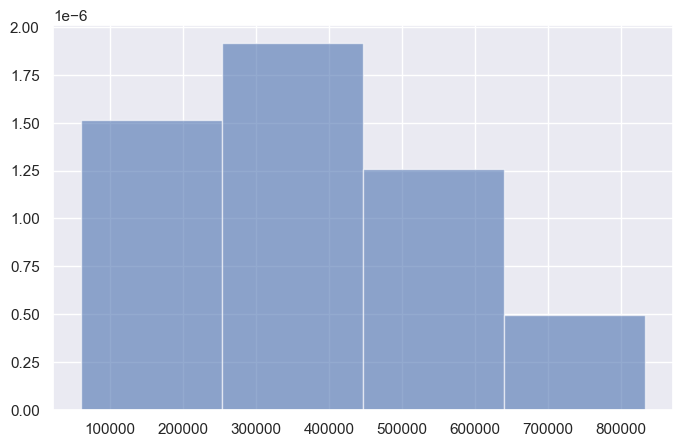

In [39]:

REB_stock = REB['stock']  
plt.hist(REB_stock, bins=4, density=True, alpha=0.6, color='b')

plt.show()


C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_19924\1628406726.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SFP.groupby('type')['Total Sales(EGP)','Total Purchases(EGP)'].sum())


<AxesSubplot:xlabel='type'>

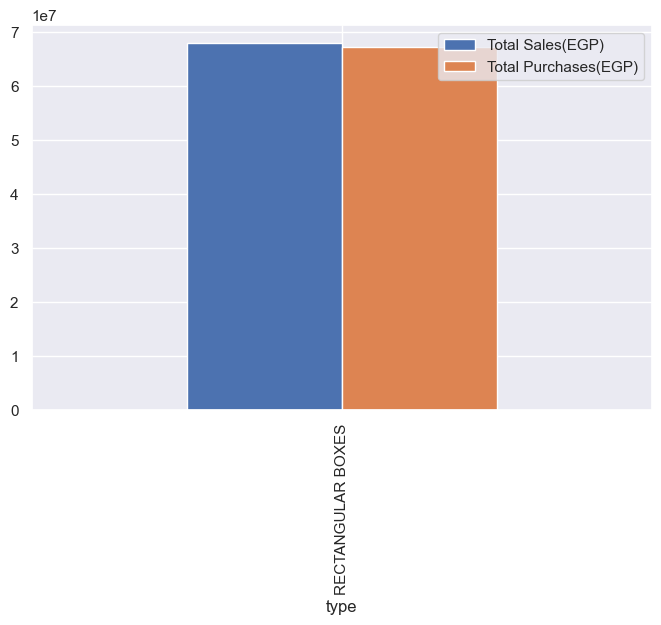

In [40]:
# Group by 'type' and calculate the sum of sales  within each group
sum_by_type = round(REB.groupby('type')['Total Sales(EGP)','Total Purchases(EGP)'].sum())
sum_by_type.plot(kind="bar")

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_19924\2858037585.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SFP.groupby('type')['Average price','Average price for sales'].mean())


<AxesSubplot:xlabel='type'>

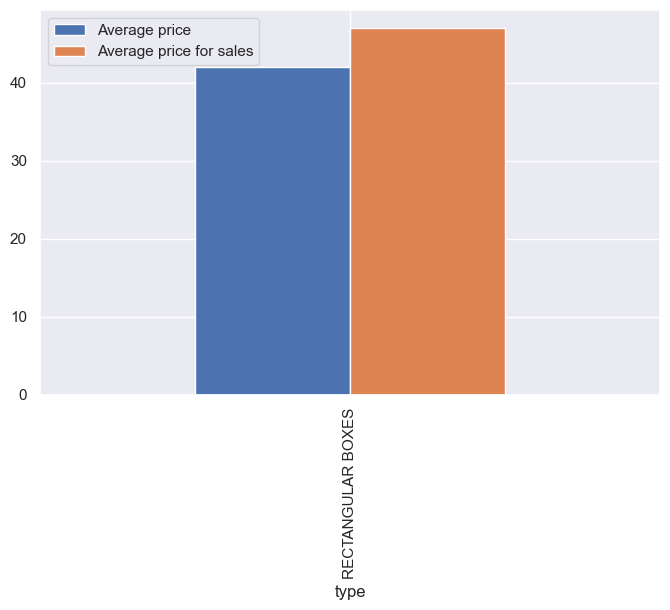

In [41]:
# Group by 'type' and calculate the sum of sales  within each group
sum_by_type = round(REB.groupby('type')['Average price','Average price for sales'].mean())
sum_by_type.plot(kind="bar")

## Sales_over_Time

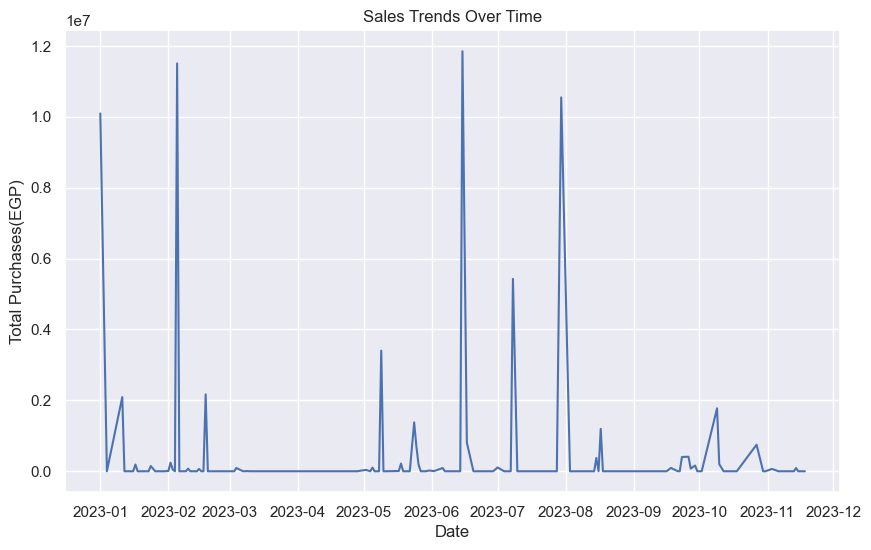

In [42]:
#the best season comes at qtr3 of each year the most selling part of the year 

REB['Date'] = pd.to_datetime(REB['Date'])

sales_by_date = REB.groupby('Date')['Total Purchases(EGP)'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(sales_by_date['Date'], sales_by_date['Total Purchases(EGP)'])
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Purchases(EGP)')
plt.grid(True)
plt.show()

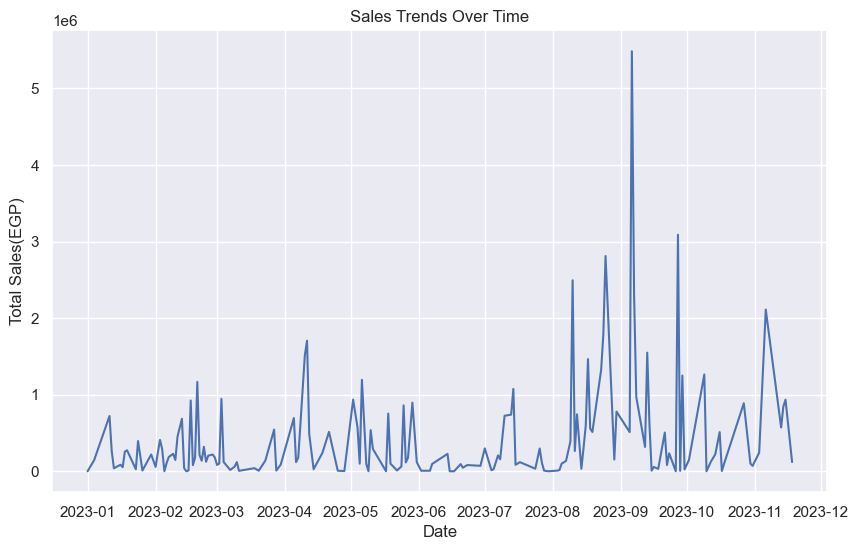

In [43]:
#the best season comes at qtr3 of each year the most selling part of the year 

REB['Date'] = pd.to_datetime(REB['Date'])

sales_by_date = REB.groupby('Date')['Total Sales(EGP)'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(sales_by_date['Date'], sales_by_date['Total Sales(EGP)'])
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales(EGP)')
plt.grid(True)
plt.show()

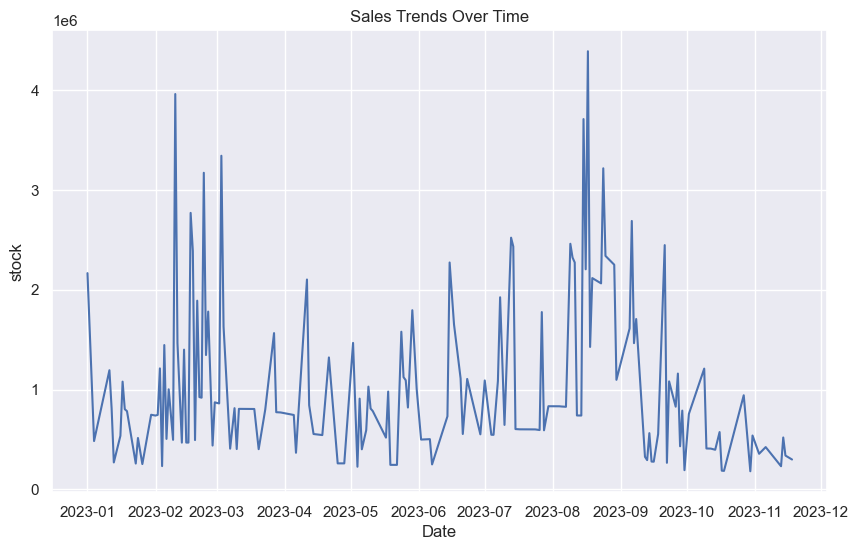

In [44]:
#the best season comes at qtr3 of each year the most selling part of the year 

REB['Date'] = pd.to_datetime(REB['Date'])

sales_by_date = REB.groupby('Date')['stock'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(sales_by_date['Date'], sales_by_date['stock'])
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('stock')
plt.grid(True)
plt.show()

In [45]:
REB_PV= pd.read_excel("ST-EXPRSS-PV.xlsx","RECTANGULAR BOXES")

In [46]:
REB_PV.head(7)

,purchases(kg),sales(kg),Stock,Holding,Order_Cost(EGP),New_Purchase,New_Stock,NEW_HOLDING,NEW_ORDER_COST,type,Week
0,244528,3220,241308,73358.4,711765,117676.194249,114456.194249,35302.858275,342528,RECTANGULAR BOXES,1
1,50753,23195,268866,87618.3,147730,0.000000,91261.194249,34336.858275,0,RECTANGULAR BOXES,2
2,4536,15133,258269,82020.6,13203,0.000000,76128.194249,27378.358275,0,RECTANGULAR BOXES,3
3,3601,9631,252239,78561.0,10482,0.000000,66497.194249,22838.458275,0,RECTANGULAR BOXES,4
4,7347,27559,232027,77875.8,21385,117676.194249,156614.388499,55252.016550,342528,RECTANGULAR BOXES,5
5,276919,25713,483233,152683.8,806047,0.000000,130901.388499,46984.316550,0,RECTANGULAR BOXES,6
6,53696,39858,497071,161078.7,156297,0.000000,91043.388499,39270.416550,0,RECTANGULAR BOXES,7


C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_19924\3790076773.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SFP_PV.groupby('type')['purchases(kg)','New_Purchase'].sum())


<AxesSubplot:xlabel='type'>

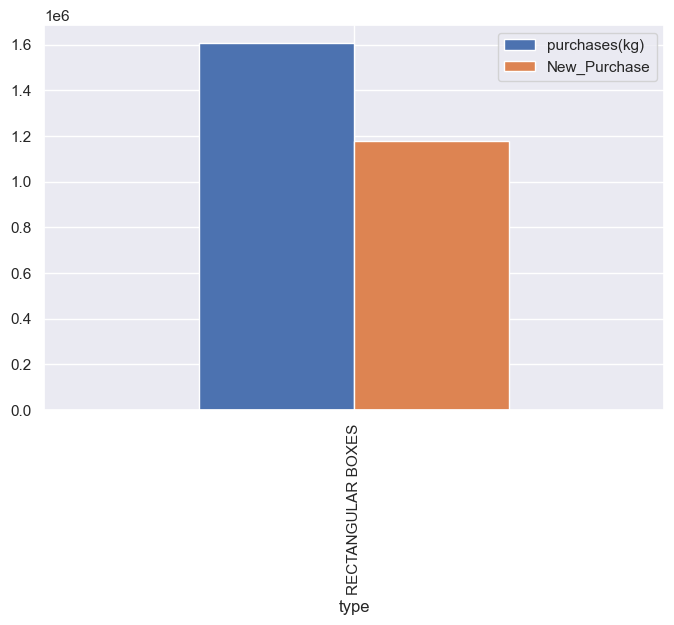

In [47]:
# Group by 'type' and calculate the sum of sales  within each group
sum_by_type = round(REB_PV.groupby('type')['purchases(kg)','New_Purchase'].sum())
sum_by_type.plot(kind="bar")

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_19924\2982615617.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SFP_PV.groupby('type')['Order_Cost(EGP)','NEW_ORDER_COST'].sum())


<AxesSubplot:xlabel='type'>

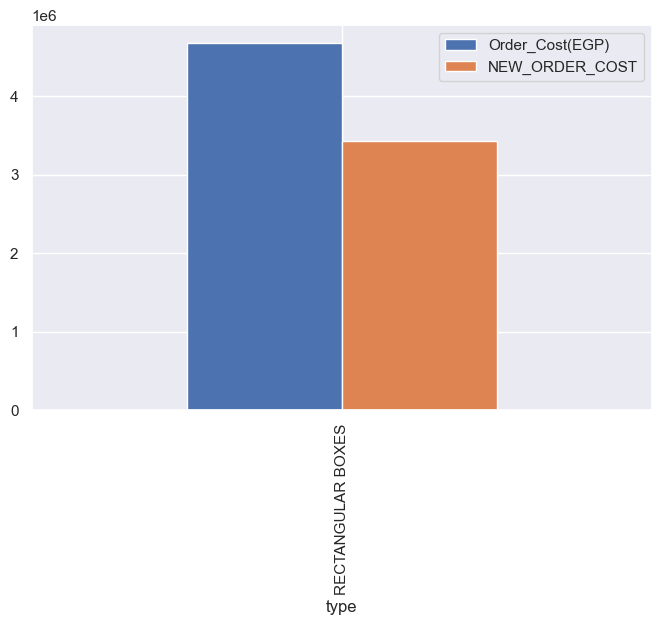

In [48]:
# Group by 'type' and calculate the sum of sales  within each group
sum_by_type = round(REB_PV.groupby('type')['Order_Cost(EGP)','NEW_ORDER_COST'].sum())
sum_by_type.plot(kind="bar")

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_19924\2411790820.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SFP_PV.groupby('type')['Holding','NEW_HOLDING'].sum())


<AxesSubplot:xlabel='type'>

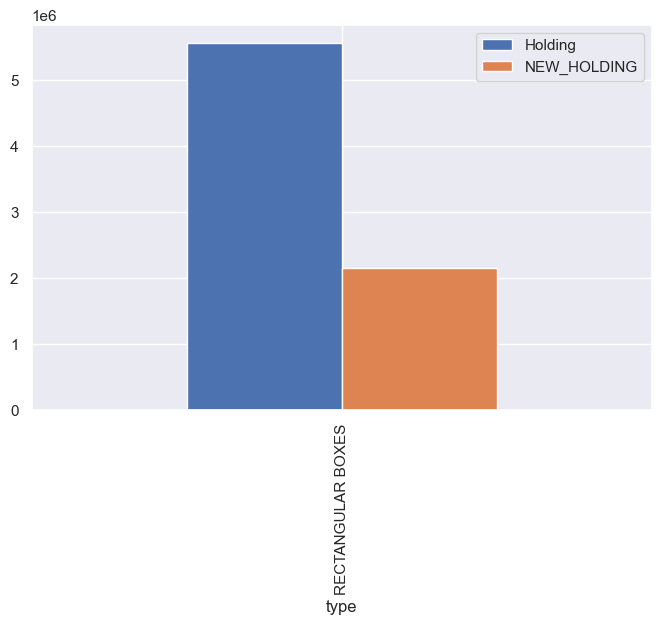

In [49]:
# Group by 'type' and calculate the sum of sales  within each group
sum_by_type = round(REB_PV.groupby('type')['Holding','NEW_HOLDING'].sum())
sum_by_type.plot(kind="bar")

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_19924\4174711715.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SFP_PV.groupby('type')['Stock','New_Stock'].sum())


<AxesSubplot:xlabel='type'>

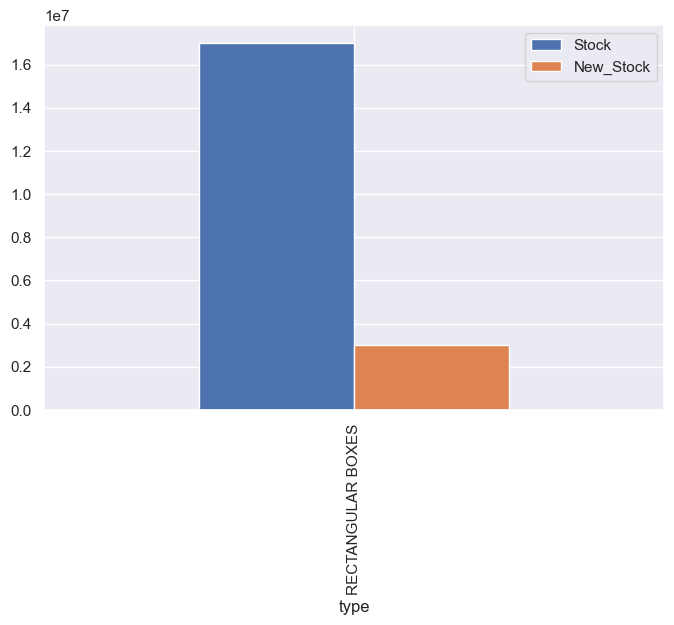

In [50]:
sum_by_type = round(REB_PV.groupby('type')['Stock','New_Stock'].sum())
sum_by_type.plot(kind="bar")

## Time_series

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_19924\1721446271.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_by_week = SFP_PV.groupby('Week')['Stock', 'New_Stock'].sum().reset_index()


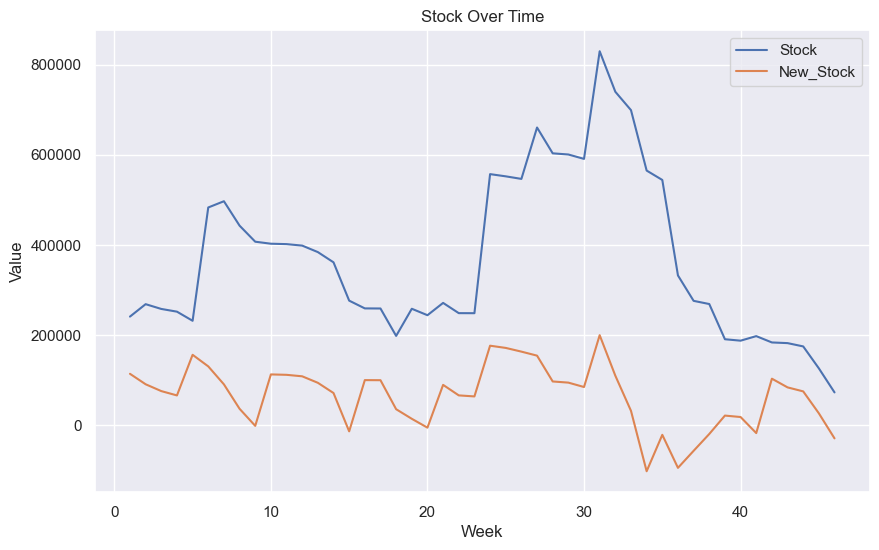

In [51]:
# Group by week and calculate the sum of each column
sales_by_week = REB_PV.groupby('Week')['Stock', 'New_Stock'].sum().reset_index()

# Columns you want to plot (excluding 'Week' column)
columns_to_plot = list(sales_by_week.columns)
columns_to_plot.remove('Week')

# Plot each column separately
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(sales_by_week['Week'], sales_by_week[column], label=column)

plt.title('Stock Over Time')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [52]:
REB_PV.columns

Index(['purchases(kg)', 'sales(kg)', 'Stock', 'Holding', 'Order_Cost(EGP)',
       'New_Purchase', 'New_Stock', 'NEW_HOLDING', 'NEW_ORDER_COST', 'type',
       'Week'],
      dtype='object')

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_19924\3393102878.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_by_week = SFP_PV.groupby('Week')['Holding', 'NEW_HOLDING'].sum().reset_index()


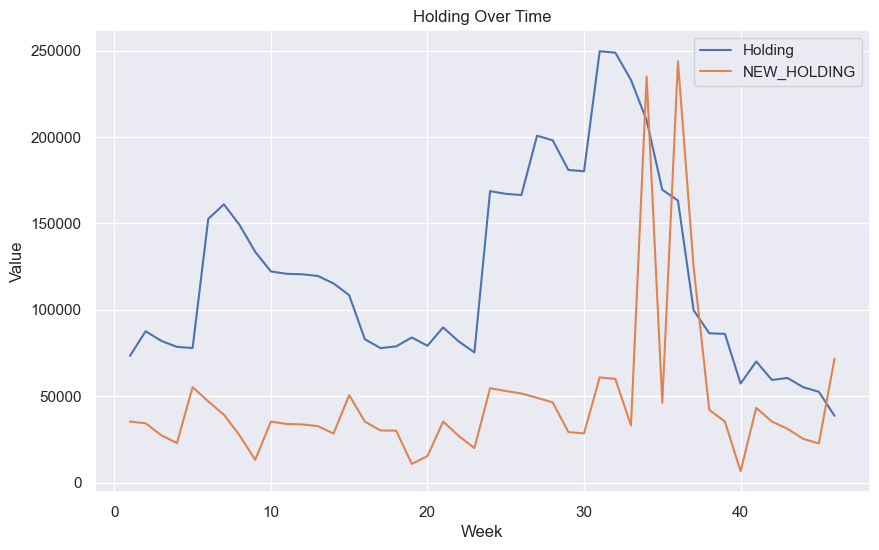

In [53]:
# Group by week and calculate the sum of each column
sales_by_week = REB_PV.groupby('Week')['Holding', 'NEW_HOLDING'].sum().reset_index()

# Columns you want to plot (excluding 'Week' column)
columns_to_plot = list(sales_by_week.columns)
columns_to_plot.remove('Week')

# Plot each column separately
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(sales_by_week['Week'], sales_by_week[column], label=column)

plt.title('Holding Over Time')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_19924\1882661033.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_by_week = SFP_PV.groupby('Week')['Order_Cost(EGP)', 'NEW_ORDER_COST'].sum().reset_index()


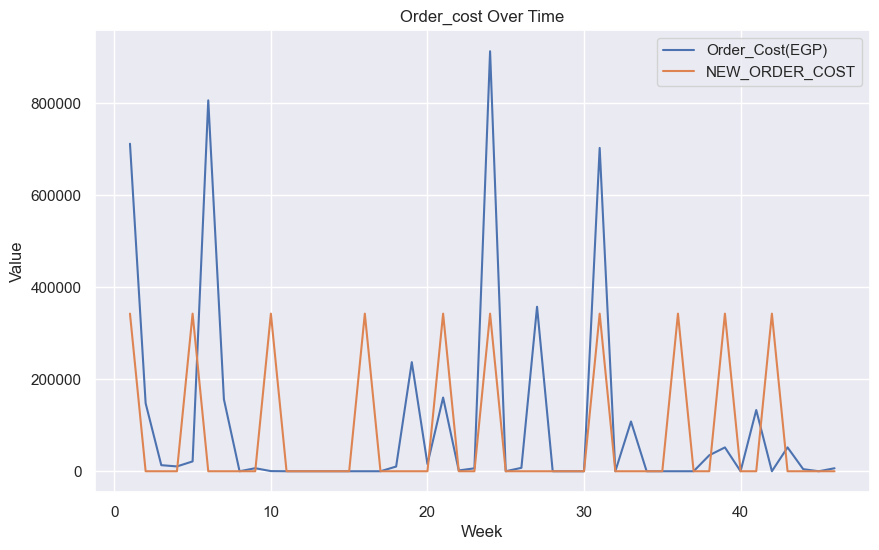

In [54]:
# Group by week and calculate the sum of each column
sales_by_week = REB_PV.groupby('Week')['Order_Cost(EGP)', 'NEW_ORDER_COST'].sum().reset_index()

# Columns you want to plot (excluding 'Week' column)
columns_to_plot = list(sales_by_week.columns)
columns_to_plot.remove('Week')

# Plot each column separately
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(sales_by_week['Week'], sales_by_week[column], label=column)

plt.title('Order_cost Over Time')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_19924\1922320098.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_by_week = SFP_PV.groupby('Week')['purchases(kg)', 'New_Purchase'].sum().reset_index()


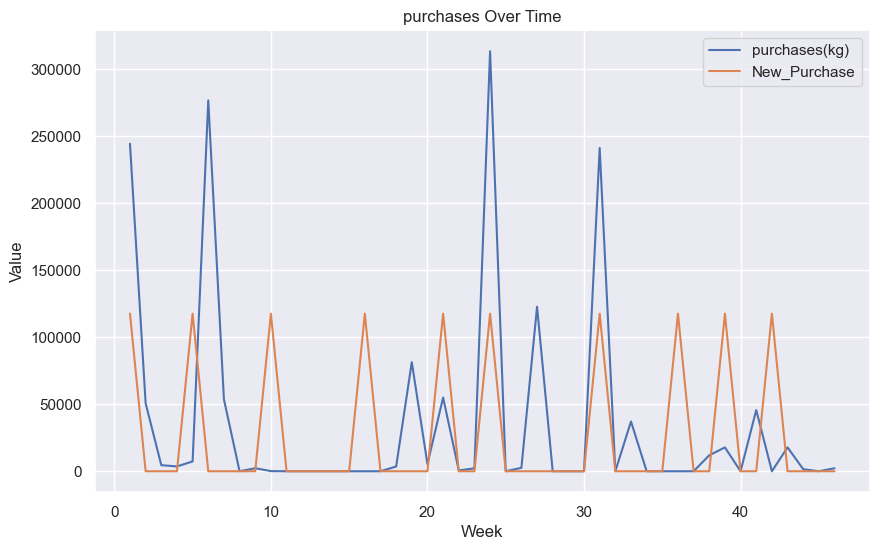

In [56]:
# Group by week and calculate the sum of each column
sales_by_week = REB_PV.groupby('Week')['purchases(kg)', 'New_Purchase'].sum().reset_index()

# Columns you want to plot (excluding 'Week' column)
columns_to_plot = list(sales_by_week.columns)
columns_to_plot.remove('Week')

# Plot each column separately
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(sales_by_week['Week'], sales_by_week[column], label=column)

plt.title('purchases Over Time')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


## Box-plots 

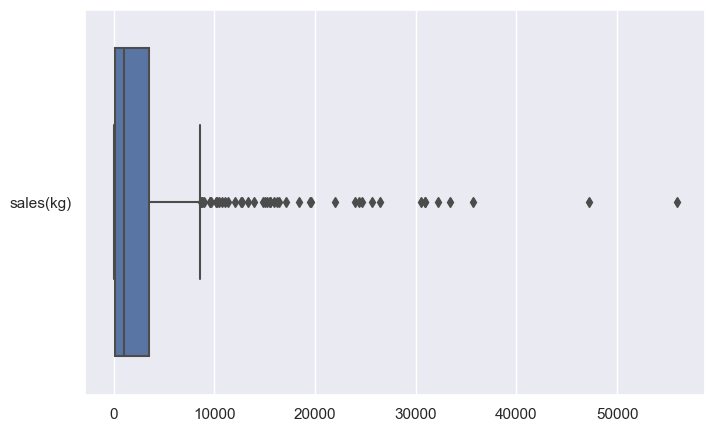

In [57]:
sns.boxplot(data=REB[["sales(kg)"]], orient="h")
plt.show()

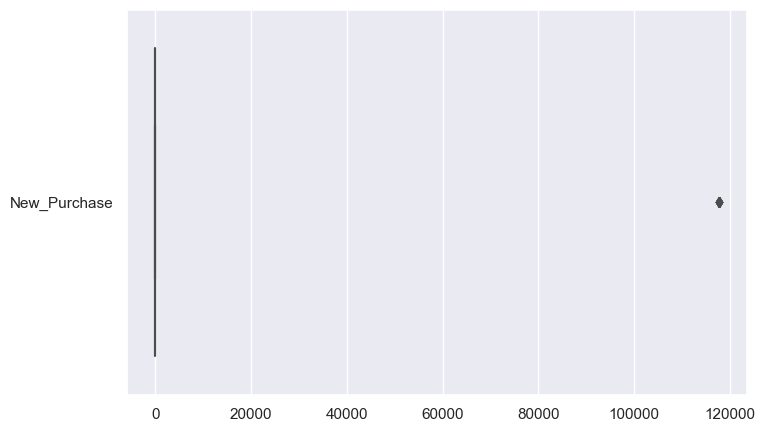

In [58]:
sns.boxplot(data=REB_PV[["New_Purchase"]], orient="h")
plt.show()

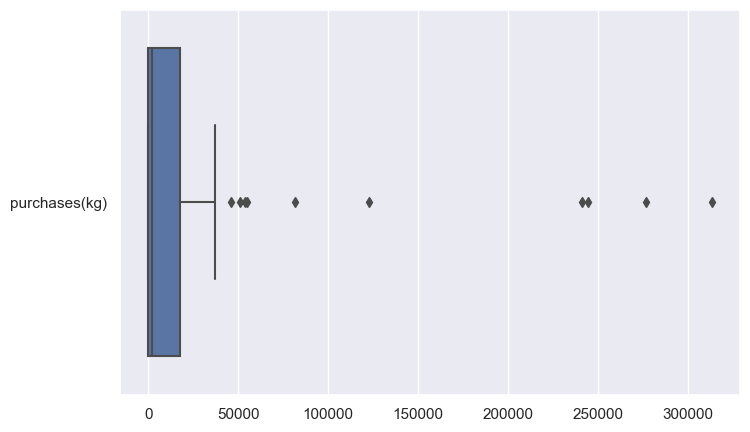

In [59]:
sns.boxplot(data=REB_PV[["purchases(kg)"]], orient="h")
plt.show()

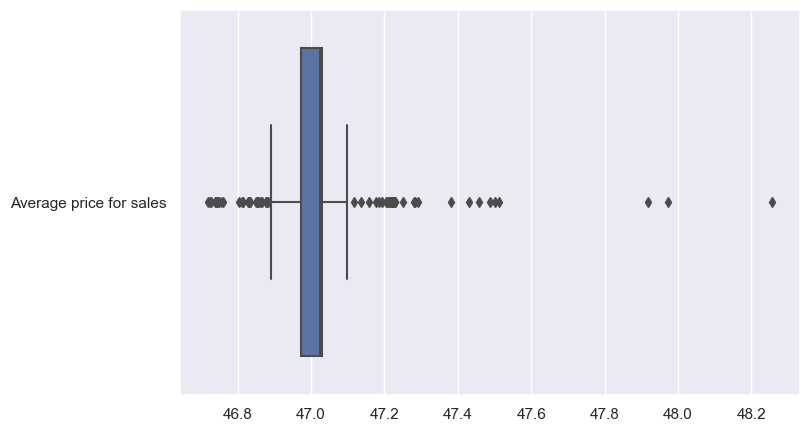

In [60]:
sns.boxplot(data=REB[["Average price for sales"]], orient="h")
plt.show()